# CLUSTER MODEL


In [150]:
#Import libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
#Data collection:

medication=pd.read_csv("C:/Users/hp/Desktop/Question 1/medical-records-10-yrs/medication_fulfillment.csv")
medication.head()

,Provider_Org,Order_ID,Member_ID,Prescription,Pharmacist_ID,Pharmacy_Name,Dispense_Date,Drug_Name,Drug_NDC,Sig,Dispense_Qty,Fill_No,Fill_Status,Dose,Units,Days_Of_Supply,Encounter_ID
0,ExactData Medical Health System,050630-23852,568001602-01,RX80452720,523808810,Corner Drug Store,2005-07-02T00:14:00Z,Hydrochlorothiazide,0172-2089-80,po qd,90,1,dispensed,50,mg,90,V3046573432409333612
1,ExactData Medical Health System,050312-01255,937650000-01,RX66597665,581395544,Family Health,2005-03-12T04:37:00Z,OMS 50,65689-001-21,via nasal cannula (contin),4320,1,dispensed,6,h,1,C2819614934032019919
2,ExactData Medical Health System,050419-86521,937650000-01,RX29972012,125920412,Wegmans,2005-04-22T06:53:00Z,Hydrochlorothiazide,0172-2089-80,po qd,90,1,dispensed,50,mg,90,N6421143613871277479
3,ExactData Medical Health System,050826-36597,666214171-01,RX35391014,381663534,Apothecary Shop,2005-08-28T04:01:00Z,Prednisone,54569-0332-3,orally,20,1,dispensed,20,mg,20,L1660181935005579193
4,ExactData Medical Health System,050228-72970,666383984-01,RX45661465,152383446,Corner Drug Store,2005-03-03T19:42:00Z,protamine sulfate,63323-229-30,/90 units of heparin overdosage,1,1,dispensed,1,mg,1,U1554150386761469892


In [152]:
lab_results=pd.read_csv("C:/Users/hp/Desktop/Question 1/medical-records-10-yrs/lab_results.csv")
lab_results.head()

,Provider_Org,Member_ID,Date_Collected,Test_ID,Specialty,Panel,Test_LOINC,Test_Name,Date_Resulted,Specimen,...,Result_Name,Result_Status,Result_Description,Numeric_Result,Units,Abnormal_Value,Reference_Range,Order_ID,Provider_ID,Encounter_ID
0,ExactData Medical Health System,568001602-01,2005-07-05T15:54:00Z,050705 CH 76296541,NaN,False,2093-3,Cholesterol,2005-07-05T20:33:41Z,NaN,...,Cholesterol,FINAL,Cholesterol=250 mg/dL,250,mg/dL,NaN,NaN,050630-30199,695700114,X3228783097331248888
1,ExactData Medical Health System,568001602-01,2005-10-07T16:15:00Z,051007 CH 47988013,NaN,False,21440-3,HPV I/H Risk DNA Probe,2005-10-07T20:10:41Z,NaN,...,HPV test,FINAL,negative for HPV 16 & 18,NaN,NaN,NaN,NaN,NaN,663746638,M3204724885018391695
2,ExactData Medical Health System,568001602-01,2005-10-07T16:15:00Z,051007 CH 04421087,NaN,False,28631-0,Visual Acuity Study,2005-10-07T17:57:09Z,NaN,...,acuity,FINAL,"right eye 20/20, left eye 20/20",NaN,NaN,NaN,NaN,NaN,663746638,M3204724885018391695
3,ExactData Medical Health System,568001602-01,2005-10-12T21:33:00Z,051012 CH 48885833,NaN,True,24331-1,Lipid Profile,2005-10-12T23:11:57Z,NaN,...,Total cholesterol,FINAL,Total cholesterol = 180mg/dL,180,mg/dL,NaN,NaN,051007-54352,695700114,G7012345417035113309
4,ExactData Medical Health System,568001602-01,2005-10-12T21:33:00Z,051012 CH 48885833,NaN,True,24331-1,Lipid Profile,2005-10-12T23:11:57Z,NaN,...,LDL,FINAL,LDL = 120mg/dL,120,mg/dL,NaN,NaN,051007-54352,695700114,G7012345417035113309


In [153]:
encounter=pd.read_csv("C:/Users/hp/Desktop/Question 1/medical-records-10-yrs/encounter.csv")
encounter.head()

,Provider_Org,Encounter_ID,Member_ID,Provider_ID,Provider_NPI,Clinic_ID,Encounter_DateTime,Encounter_Description,CC,Episode_ID,...,medication_orders_count,medication_fulfillment_count,vital_sign_count,therapy_orders_count,therapy_actions_count,immunization_count,Has_Appt,SOAP_Note,consult_ordered,Disposition
0,ExactData Medical Health System,L8694502508698944760,568001602-01,663746638,2531462832,Sidney Hillman Health Center,2005-06-30T19:15:00Z,Lacy visited primary care physician on 6/30/20...,mild occasional lightheadedness,L8694502508698944760,...,1,0,7,0,1,0,True,s:a 33 year old female crystallographer presen...,NaN,ReleasedWithoutLimitations
1,ExactData Medical Health System,V3046573432409333612,568001602-01,523808810,1380097962,Corner Drug Store,2005-07-01T23:44:00Z,Lacy visited pharmacy on 7/1/2005 6:44:00 PM f...,NaN,L8694502508698944760,...,0,1,0,0,0,0,False,NaN,NaN,ReleasedWithoutLimitations
2,ExactData Medical Health System,X3228783097331248888,568001602-01,695700114,1261075194,Wood Diagnostic Labs,2005-07-05T14:54:00Z,Lacy visited medical lab on 7/5/2005 9:54:00 A...,NaN,L8694502508698944760,...,0,0,0,0,0,0,False,NaN,NaN,ReleasedWithoutLimitations
3,ExactData Medical Health System,M3204724885018391695,568001602-01,663746638,2531462832,Sidney Hillman Health Center,2005-10-07T15:45:00Z,Lacy visited primary care physician on 10/7/20...,NaN,M3204724885018391695,...,0,0,7,0,1,1,True,s:33 yr old female crystallographer presents t...,NaN,ReleasedWithoutLimitations
4,ExactData Medical Health System,G7012345417035113309,568001602-01,695700114,1261075194,Wood Diagnostic Labs,2005-10-12T20:33:00Z,Lacy visited medical lab on 10/12/2005 3:33:00...,NaN,M3204724885018391695,...,0,0,0,0,0,0,False,NaN,NaN,ReleasedWithoutLimitations


In [154]:
encounter_dx=pd.read_csv("C:/Users/hp/Desktop/Question 1/medical-records-10-yrs/encounter_dx.csv")
encounter_dx.head()

,Provider_Org,code,vocab,description,severity,Encounter_ID
0,ExactData Medical Health System,401.9,ICD9,Hypertension,mild,L8694502508698944760
1,ExactData Medical Health System,V70.0,ICD9,General medical examination,NaN,M3204724885018391695
2,ExactData Medical Health System,496,ICD9,Chronic Obstructive Pulmonary Disease,critical,C2819614934032019919
3,ExactData Medical Health System,401.9,ICD9,Hypertension,mild,S4571692645992867370
4,ExactData Medical Health System,V70.0,ICD9,General medical examination,NaN,J6262874375300991101


In [155]:
#Checking the no. of rows & columns:

m=medication.shape #medication_fulfillment data
print("Medication Fulfillment: \n",m)

l=lab_results.shape #lab_results data
print("\nLab results: \n",l)

e=encounter.shape#encounter data
print("\nEncounter: \n",e)

e_dx=encounter_dx.shape#encounter_dx data
print("\nEncounter_Dx: \n",e_dx)

Medication Fulfillment: 
 (1176, 17)

Lab results: 
 (7509, 21)

Encounter: 
 (5447, 28)

Encounter_Dx: 
 (3063, 6)


In [156]:
#Checking for Missing values:

m=medication.isnull().sum()
print("Medication Fulfillment: \n",m)
print('----------------------------------')

l=lab_results.isnull().sum()
print("\nLab results: \n",l)
print('----------------------------------')

e=encounter.isnull().sum()
print("\nEncounter: \n",e)
print('----------------------------------')

e_dx=encounter_dx.isnull().sum()
print("\nEncounter_Dx: \n",e_dx)

Medication Fulfillment: 
 Provider_Org      0
Order_ID          0
Member_ID         0
Prescription      0
Pharmacist_ID     0
Pharmacy_Name     0
Dispense_Date     0
Drug_Name         0
Drug_NDC          0
Sig               0
Dispense_Qty      0
Fill_No           0
Fill_Status       0
Dose              0
Units             0
Days_Of_Supply    0
Encounter_ID      0
dtype: int64
----------------------------------

Lab results: 
 Provider_Org             0
Member_ID                0
Date_Collected           0
Test_ID                  0
Specialty             7509
Panel                    0
Test_LOINC               0
Test_Name                0
Date_Resulted            0
Specimen              7509
Result_LOINC             0
Result_Name              0
Result_Status            0
Result_Description       0
Numeric_Result        4619
Units                 4715
Abnormal_Value        7509
Reference_Range       7509
Order_ID              1499
Provider_ID              0
Encounter_ID             0
dty

In [157]:
#Allow to learn the shape of the object type of the data

medication.info() 
print('----------------------------------\n')

lab_results.info()
print('----------------------------------\n')

encounter.info()
print('----------------------------------\n')

encounter_dx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider_Org    1176 non-null   object
 1   Order_ID        1176 non-null   object
 2   Member_ID       1176 non-null   object
 3   Prescription    1176 non-null   object
 4   Pharmacist_ID   1176 non-null   int64 
 5   Pharmacy_Name   1176 non-null   object
 6   Dispense_Date   1176 non-null   object
 7   Drug_Name       1176 non-null   object
 8   Drug_NDC        1176 non-null   object
 9   Sig             1176 non-null   object
 10  Dispense_Qty    1176 non-null   object
 11  Fill_No         1176 non-null   int64 
 12  Fill_Status     1176 non-null   object
 13  Dose            1176 non-null   object
 14  Units           1176 non-null   object
 15  Days_Of_Supply  1176 non-null   int64 
 16  Encounter_ID    1176 non-null   object
dtypes: int64(3), object(14)
memory usage: 156.3+ KB
----

In [305]:
# using merge function by setting how='left'
output = pd.merge(encounter, encounter_dx, on='Encounter_ID',how='inner')
op1 = pd.DataFrame(output)
op1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3059 entries, 0 to 3058
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Provider_Org_x                3059 non-null   object 
 1   Encounter_ID                  3059 non-null   object 
 2   Member_ID                     3059 non-null   object 
 3   Provider_ID                   3059 non-null   int64  
 4   Provider_NPI                  3059 non-null   int64  
 5   Clinic_ID                     3059 non-null   object 
 6   Encounter_DateTime            3059 non-null   object 
 7   Encounter_Description         3059 non-null   object 
 8   CC                            2519 non-null   object 
 9   Episode_ID                    3059 non-null   object 
 10  Patient_DOB                   3059 non-null   object 
 11  Patient_Gender                3059 non-null   object 
 12  Facility_Name                 0 non-null      float64
 13  Pro

In [272]:
op1.corr().T

,Provider_ID,Provider_NPI,Facility_Name,lab_orders_count,lab_results_count,medication_orders_count,medication_fulfillment_count,vital_sign_count,therapy_orders_count,therapy_actions_count,immunization_count,Has_Appt
Provider_ID,1.000000,0.236163,NaN,-0.005728,0.054885,-0.033510,0.118517,0.005509,0.101240,-0.031595,0.010659,NaN
Provider_NPI,0.236163,1.000000,NaN,0.096354,0.134202,-0.018731,0.026136,0.195934,-0.034622,-0.071313,0.104398,NaN
Facility_Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lab_orders_count,-0.005728,0.096354,NaN,1.000000,0.626877,0.190023,-0.246301,0.173607,-0.159138,-0.069077,0.554539,NaN
lab_results_count,0.054885,0.134202,NaN,0.626877,1.000000,-0.104729,0.194305,0.188915,-0.182349,-0.075168,0.528591,NaN
medication_orders_count,-0.033510,-0.018731,NaN,0.190023,-0.104729,1.000000,-0.249248,0.175684,0.218120,-0.069904,0.008739,NaN
medication_fulfillment_count,0.118517,0.026136,NaN,-0.246301,0.194305,-0.249248,1.000000,0.106716,-0.103008,-0.042462,-0.149371,NaN
vital_sign_count,0.005509,0.195934,NaN,0.173607,0.188915,0.175684,0.106716,1.000000,0.072606,-0.255286,0.105286,NaN
therapy_orders_count,0.101240,-0.034622,NaN,-0.159138,-0.182349,0.218120,-0.103008,0.072606,1.000000,-0.028889,-0.101627,NaN
therapy_actions_count,-0.031595,-0.071313,NaN,-0.069077,-0.075168,-0.069904,-0.042462,-0.255286,-0.028889,1.000000,-0.041892,NaN


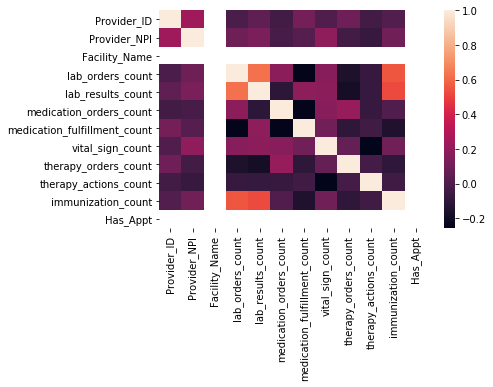

In [273]:
sns.heatmap(op1.corr())

In [447]:
# Droping unnecessary features
medi_df1 = op1.drop(op1.columns[[0,1,3,4,7,9,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]],axis=1)

In [448]:
#Allow to learn the shape of the object type of the new dataframe:

medi_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3059 entries, 0 to 3058
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Member_ID           3059 non-null   object
 1   Clinic_ID           3059 non-null   object
 2   Encounter_DateTime  3059 non-null   object
 3   CC                  2519 non-null   object
 4   Patient_Gender      3059 non-null   object
 5   severity            2363 non-null   object
dtypes: object(6)
memory usage: 167.3+ KB


In [449]:
#Checking for null values:

medi_df1.isnull().sum()

Member_ID               0
Clinic_ID               0
Encounter_DateTime      0
CC                    540
Patient_Gender          0
severity              696
dtype: int64

In [450]:
#droping the null values:

medi_df1 = medi_df1.dropna()
medi_df1 = medi_df1.reset_index(drop=True)

In [451]:
#Checking for null values after droping :

medi_df1.isnull().sum()

Member_ID             0
Clinic_ID             0
Encounter_DateTime    0
CC                    0
Patient_Gender        0
severity              0
dtype: int64

In [452]:
#grouping the new data with specific feature:

medi=medi_df1.groupby('CC')
medi.first()

,Member_ID,Clinic_ID,Encounter_DateTime,Patient_Gender,severity
CC,,,,,
Acute Renal Failure,666643100-01,Partners in Primary Care,2005-04-22T15:15:00Z,male,mild
Chronic Renal Failure,666867671-01,Joel Wilkerson MD,2005-07-21T19:45:00Z,male,mild
Embolic Stroke,666655553-01,Ulnacs Medical Care GO Okoji MD,2005-11-30T15:30:00Z,female,moderate
Hemorrhagic Stroke,666383984-01,Ulnacs Medical Care GO Okoji MD,2005-02-28T17:30:00Z,male,moderate
Kidney Stones,000232359-01,Advocate Medical Group,2005-10-11T19:00:00Z,female,mild
...,...,...,...,...,...
severe increased thirst,666476868-01,Samaritan Medical Center,2008-01-01T23:22:00Z,female,severe
severe shortness of breath,666214171-01,Heartland Community Health Clinic,2005-08-24T17:00:00Z,female,severe
severe stump pain,052000568-01,Community Health Clinic,2005-10-12T13:45:00Z,male,severe


In [460]:
# Encoding all the ordinal columns and creating a dummy variable :

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in (['Patient_Gender','Member_ID','Clinic_ID','CC','Encounter_DateTime','severity']):
    medi_df1.loc[:,i]=enc.fit_transform(medi_df1.loc[:,i])
medi_df1.head()

,Member_ID,Clinic_ID,Encounter_DateTime,CC,Patient_Gender,severity
0,55,45,117,23,0,1
1,101,15,26,10,0,0
2,101,1,50,29,0,1
3,67,22,178,74,0,3
4,67,7,180,70,0,3


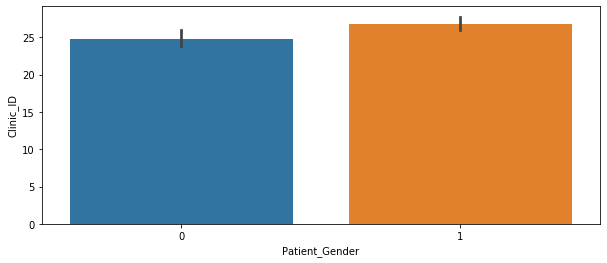

In [461]:
#Visulaization:

#Visualization for patient gender vs clinic id:
plt.figure(figsize=(10,4))
sns.barplot(medi_df1['Patient_Gender'],medi_df1['Clinic_ID'])

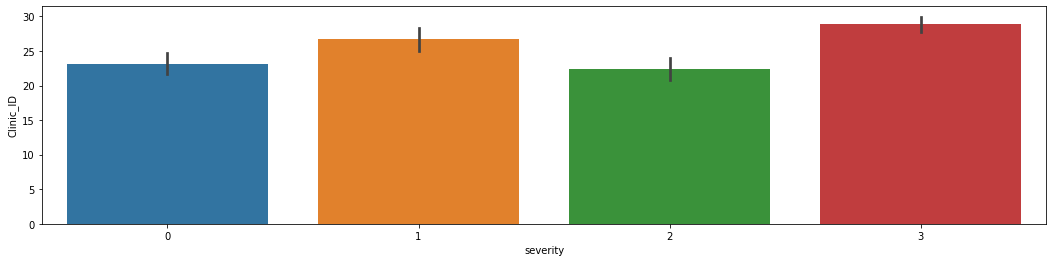

In [462]:
#Visualization for severity vs clinic id:
plt.figure(figsize=(18,4))
sns.barplot(medi_df1['severity'],medi_df1['Clinic_ID'])

In [563]:
# Here we have selected only the important columns
y = medi_df1.CC
X = medi_df1.iloc[:,[0,1,2,4,5]]
X.head()

,Member_ID,Clinic_ID,Encounter_DateTime,Patient_Gender,severity
0,55,45,117,0,1
1,101,15,26,0,0
2,101,1,50,0,1
3,67,22,178,0,3
4,67,7,180,0,3


In [564]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Splitting into train and test for calculating the accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [565]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [566]:
X_train.shape

(1565, 5)

In [567]:
X_test.shape

(672, 5)

## K-means Clustering:

In [568]:
#initially assigns a random datapoints as centroids for clusters
import random
def random_centers(dim,k):
#creating k random indices and using the datapoint at that indices as centroid
    centers = []
    for i in range(k):
        center = []
        for d in range(dim):
            rand = random.randint(0,100)
            center.append(rand)
        centers.append(center)
    return centers

In [569]:
#determines which data point goes to which cluster
def point_clustering(data, centers, dims, first_cluster=False):
    for point in data:
        nearest_center = 0
        nearest_center_dist = None
        for i in range(0, len(centers)):
            euclidean_dist = 0
            for d in range(dims):
                dist = abs(point[d] - centers[i][d])
                euclidean_dist += dist
            euclidean_dist = np.sqrt(euclidean_dist)
            if nearest_center_dist == None:
                nearest_center_dist = euclidean_dist
                nearest_center = i
            elif nearest_center_dist > euclidean_dist:
                nearest_center_dist = euclidean_dist
                nearest_center = i
        if first_cluster:
            point.append(nearest_center)
        else:
            point[-1] = nearest_center
    return data

In [570]:
def mean_center(data, centers, dims):
    print('centers:', centers, 'dims:', dims)
    new_centers = []
    for i in range(len(centers)):
        new_center = []
        n_of_points = 0
        total_of_points = []
        for point in data:
            if point[-1] == i:
                n_of_points += 1
                for dim in range(1,dims):
                    if dim < len(total_of_points):
                        total_of_points[dim] += point[dim]
                    else:
                        total_of_points.append(point[dim])
        if len(total_of_points) != 0:
            for dim in range(0,dims):
                print(total_of_points, dim)
                new_center.append(total_of_points[dim]/n_of_points)
            new_centers.append(new_center)
        else: 
            new_centers.append(centers[i])
        
            
    return new_centers

In [574]:
# Gets data and k, returns a list of center points.
def train_k_means_clustering(data, k=5, epochs=5):
    dims = len(data)
    centers = random_centers(dims,k)
    
    clustered_data = point_clustering(data, centers, dims, first_cluster=True)

    for i in range(epochs):
        centers = mean_center(clustered_data, centers, dims)
        clustered_data = point_clustering(data, centers, dims, first_cluster=False)
    
    return centers

In [575]:
def predict_k_means_clustering(point, centers):
    dims = len(point)
    center_dims = len(centers)
    
    if dims != center_dims:
        raise ValueError('Point given for prediction have', dims, 'dimensions but centers have', center_dims, 'dimensions')

    nearest_center = None
    nearest_dist = None
    
    for i in range(len(centers)):
        euclidean_dist = 0
        for dim in range(1, dims):
            dist = point[dim] - centers[i][dim]
            euclidean_dist += dist**2
        euclidean_dist = np.sqrt(euclidean_dist)
        if nearest_dist == None:
            nearest_dist = euclidean_dist
            nearest_center = i
        elif nearest_dist > euclidean_dist:
            nearest_dist = euclidean_dist
            nearest_center = i
        print('center:',i, 'dist:',euclidean_dist)
            
    return nearest_center

In [ ]:
centers = train_k_means_clustering(X, k=5, epochs=5)